In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

# **IMPORTING REQUIRED LIBRARIES**

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as wid
import tqdm
import io
from PIL import Image
from sklearn.model_selection import train_test_split as tts
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

2024-05-25 10:15:35.693748: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 10:15:35.693849: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 10:15:35.823745: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **READING THE DATASET FROM THE DESIGNATED FOLDER DIRECTORIES**

In [4]:
x_train = []
y_train = []
#Setting up the size of image in which it should be read by the model.
image_size = 256
#Mentioning the different classes of output as our labels.
labels = ['glioma','meningioma','notumor','pituitary']

In [5]:
# Loop to access the Dataset in Training folder
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training',i)
    for j in os.listdir(folderPath):
        image = cv2.imread(os.path.join(folderPath,j))
        image = cv2.resize(image,(image_size,image_size))
        x_train.append(image)
        y_train.append(i)

In [6]:
# Loop to access the Dataset in Testing folder
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing',i)
    for j in os.listdir(folderPath):
        image = cv2.imread(os.path.join(folderPath,j))
        image = cv2.resize(image,(image_size,image_size))
        x_train.append(image)
        y_train.append(i)

In the above two cells, I executed the reading of the dataset from both the **training** as well as the **testing** folders as i don't want to rely on the authors's information on how the data is distributed. **There may be a scenario or by chance the data may be segregated on a biased nature. To ensure unbiasness towards my research, i opted to train the model on the whole data** and later, i will myself divide the data among the training, validation and testing part.

After the exceution of the above codes, variables **x_train** and **y_train** will consist data of 1-D array but my model requires dataset of 2-D array, so i will convert them to numpy arrays.

In [7]:
x_train = np.array(x_train)
y_train = np.array(y_train)

Now, i am going to shuffle my dataset to reduce biasness and increase versatility in the data.

In [8]:
x_train,y_train = shuffle(x_train,y_train,random_state=111)
x_train.shape

(7023, 256, 256, 3)

From the above output, We get to know that there are total **7023 images** each of size **256 * 256** with **3 RGB** channels.

In [9]:
x_train

array([[[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        ...,

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]],


       [[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0, 

In [27]:
y_train

array(['meningioma', 'notumor', 'notumor', ..., 'pituitary', 'meningioma',
       'notumor'], dtype='<U10')

# **SPLITTING OF DATA INTO TRAINING AND TESTING PART**

In [10]:
x_train,x_test,y_train,y_test = tts(x_train,y_train,test_size=0.2,random_state=111)

In this, **x_train** variable consist of images converted to numpy array so it is **numerical** in nature and ready to be used by the model. However, **y_train** variable consist of **labels** of images and is **not of numerical type** and for our **CNN 2D model**, we will require **numerical array**. Therefore, i'll **convert the all the labels in a numerical value**.

In [11]:
Y_train=[]
for i in y_train:
    if(i=='glioma'):
        Y_train.append(0)
    elif(i=='meningioma'):
        Y_train.append(1)
    elif(i=='notumor'):
        Y_train.append(2)
    elif(i=='pituitary'):
        Y_train.append(3)

**The below code will convert the label values in categorical variables as this is a classification problem.**

In [12]:
Y_train = tf.keras.utils.to_categorical(Y_train)

Same, i have done for testing variables.

In [13]:
Y_test=[]
for i in y_test:
    if(i=='glioma'):
        Y_test.append(0)
    elif(i=='meningioma'):
        Y_test.append(1)
    elif(i=='notumor'):
        Y_test.append(2)
    elif(i=='pituitary'):
        Y_test.append(3)

In [14]:
Y_test = tf.keras.utils.to_categorical(Y_test)

# **BUILDING CONVOLUTIONAL NEURAL NETWORK 2D MODEL**

In [15]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(256,256,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [31]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

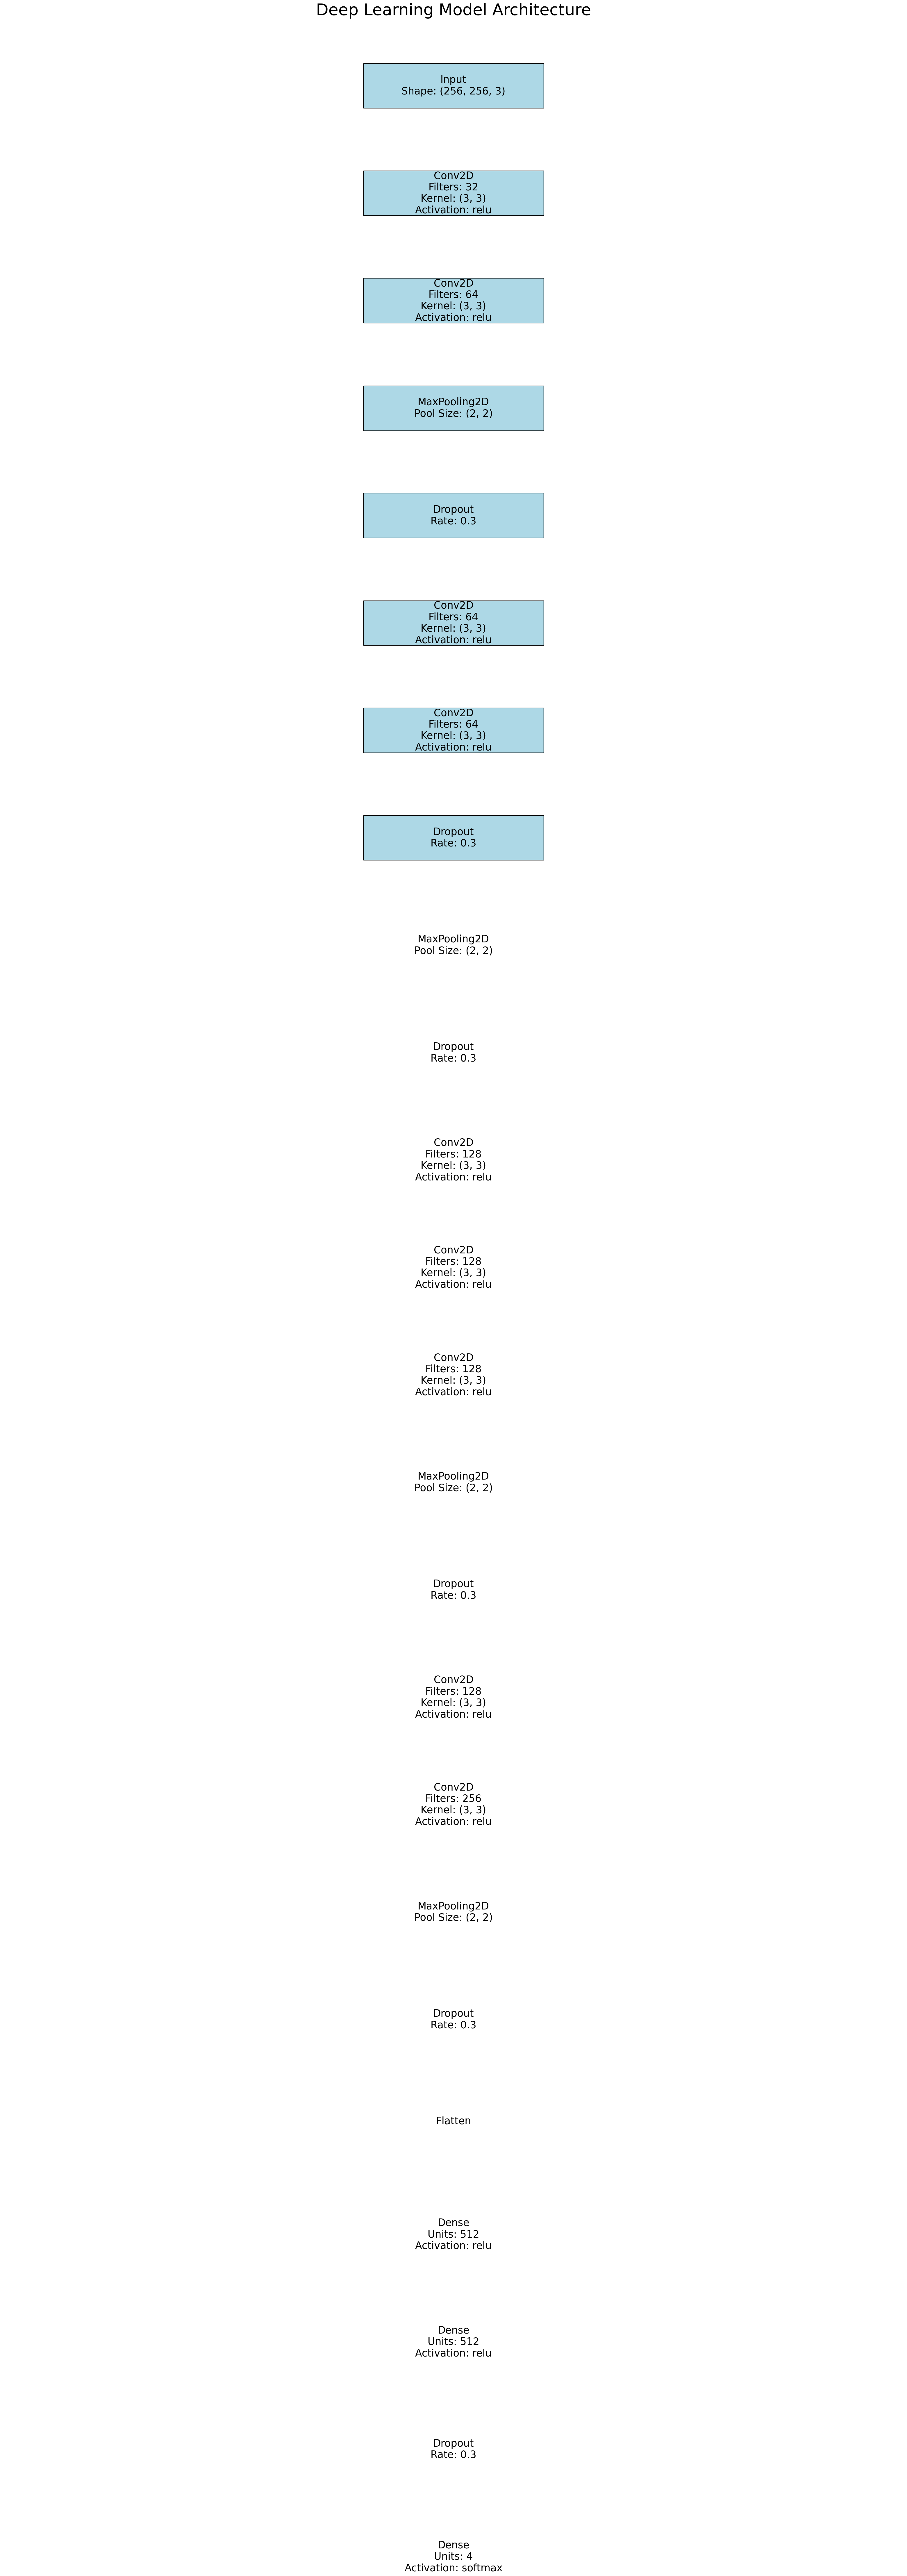

In [57]:
# Define the model architecture
layers = [
    {"type": "Input", "shape": "(256, 256, 3)"},
    {"type": "Conv2D", "filters": 32, "kernel_size": "(3, 3)", "activation": "relu"},
    {"type": "Conv2D", "filters": 64, "kernel_size": "(3, 3)", "activation": "relu"},
    {"type": "MaxPooling2D", "pool_size": "(2, 2)"},
    {"type": "Dropout", "rate": 0.3},
    {"type": "Conv2D", "filters": 64, "kernel_size": "(3, 3)", "activation": "relu"},
    {"type": "Conv2D", "filters": 64, "kernel_size": "(3, 3)", "activation": "relu"},
    {"type": "Dropout", "rate": 0.3},
    {"type": "MaxPooling2D", "pool_size": "(2, 2)"},
    {"type": "Dropout", "rate": 0.3},
    {"type": "Conv2D", "filters": 128, "kernel_size": "(3, 3)", "activation": "relu"},
    {"type": "Conv2D", "filters": 128, "kernel_size": "(3, 3)", "activation": "relu"},
    {"type": "Conv2D", "filters": 128, "kernel_size": "(3, 3)", "activation": "relu"},
    {"type": "MaxPooling2D", "pool_size": "(2, 2)"},
    {"type": "Dropout", "rate": 0.3},
    {"type": "Conv2D", "filters": 128, "kernel_size": "(3, 3)", "activation": "relu"},
    {"type": "Conv2D", "filters": 256, "kernel_size": "(3, 3)", "activation": "relu"},
    {"type": "MaxPooling2D", "pool_size": "(2, 2)"},
    {"type": "Dropout", "rate": 0.3},
    {"type": "Flatten"},
    {"type": "Dense", "units": 512, "activation": "relu"},
    {"type": "Dense", "units": 512, "activation": "relu"},
    {"type": "Dropout", "rate": 0.3},
    {"type": "Dense", "units": 4, "activation": "softmax"}
]

# Plot the model architecture
fig, ax = plt.subplots(figsize=(40,40))
x, y = 0.4, 0.9  # Adjust x to center horizontally
w, h = 0.2, 0.05
spacing = 0.12

for layer in layers:
    layer_type = layer["type"]
    label = f'{layer_type}\n'
    if layer_type == "Conv2D":
        label += f'Filters: {layer["filters"]}\nKernel: {layer["kernel_size"]}\nActivation: {layer["activation"]}'
    elif layer_type == "Dense":
        label += f'Units: {layer["units"]}\nActivation: {layer["activation"]}'
    elif layer_type == "MaxPooling2D":
        label += f'Pool Size: {layer["pool_size"]}'
    elif layer_type == "Dropout":
        label += f'Rate: {layer["rate"]}'
    elif layer_type == "Input":
        label += f'Shape: {layer["shape"]}'
    
    rect = Rectangle((x, y), w, h, edgecolor='black', facecolor='lightblue')
    ax.add_patch(rect)
    plt.text(x + w/2, y + h/2, label, ha='center', va='center', fontsize=25)
    y -= spacing

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

plt.title('Deep Learning Model Architecture',fontsize = 40)
plt.show()



In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 122, 122, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 122, 122, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 57, 57, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 55, 55, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 23, 23, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    15,860,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,029,956 (64.96 MB)

 Trainable params: 17,029,956 (64.96 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# **MODEL TRAINING**

In [18]:
history = model.fit(x_train,Y_train,epochs=25,validation_split=0.15)

Epoch 1/25


2024-05-25 10:17:00.060256: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 5.22285, expected 4.50617
2024-05-25 10:17:00.060320: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19: 4.83523, expected 4.11855
2024-05-25 10:17:00.060330: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 20: 6.14347, expected 5.42679
2024-05-25 10:17:00.060338: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21: 5.72417, expected 5.00749
2024-05-25 10:17:00.060346: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 6.00776, expected 5.29109
2024-05-25 10:17:00.060355: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 5.39609, expected 4.67941
2024-05-25 10:17:00.060363: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 5.14673, expected 4.43005
2024-05-25 10:17:00.060371: E external/local_xla/

  1/150 ━━━━━━━━━━━━━━━━━━━━ 1:28:06 35s/step - accuracy: 0.2500 - loss: 14.5247

I0000 00:00:1716632245.970941     120 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.3905 - loss: 32.3127

2024-05-25 10:17:46.796554: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 5.59911, expected 4.91071
2024-05-25 10:17:46.796609: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.25657, expected 4.56817
2024-05-25 10:17:46.796625: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.49439, expected 4.80599
2024-05-25 10:17:46.796642: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19: 5.2323, expected 4.54389
2024-05-25 10:17:46.796657: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 20: 4.63754, expected 3.94913
2024-05-25 10:17:46.796669: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 27: 5.64536, expected 4.95695
2024-05-25 10:17:46.796698: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 5.78103, expected 5.09263
2024-05-25 10:17:46.796709: E external/local_xla/xla

150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.3029 - loss: 11089.1582 - val_accuracy: 0.2752 - val_loss: 33933904.0000
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.2700 - loss: 9843869.0000 - val_accuracy: 0.2752 - val_loss: 7205300736.0000
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.2398 - loss: 902260352.0000 - val_accuracy: 0.2705 - val_loss: 239467151360.0000
Epoch 6/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.2594 - loss: 41902752.0000 - val_accuracy: 0.2764 - val_loss: 7579149824.0000
Epoch 7/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.3168 - loss: 650944576.0000 - val_accuracy: 0.3784 - val_loss: 121967435776.0000
Epoch 8/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.2973 - loss: 1267695104.0000 - val_accuracy: 0.4235 - val_loss: 474128416768.0000
Epoch 9/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.3243 - loss: 1932470400.0000 - val_accuracy: 0.3950 - va

In [19]:
model.save('bt.h5')

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

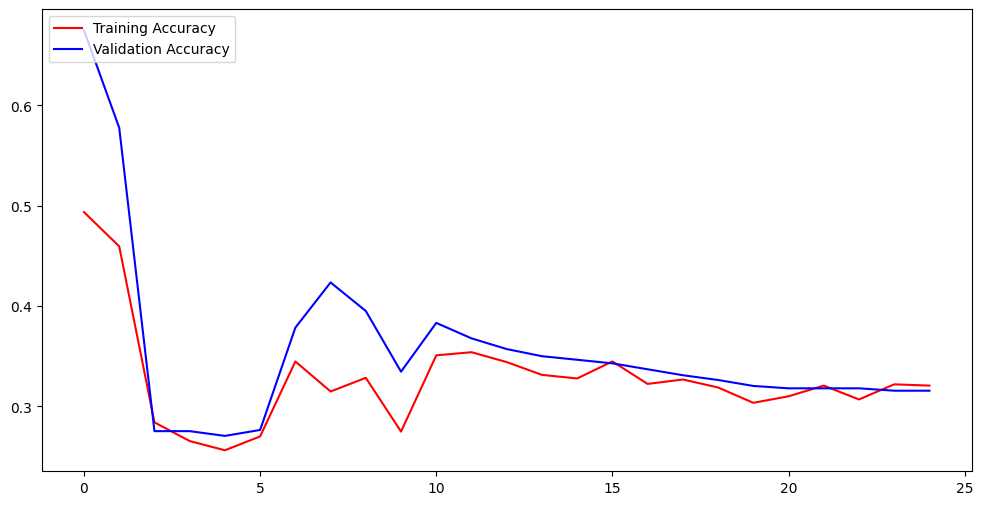

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize = (12,6))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

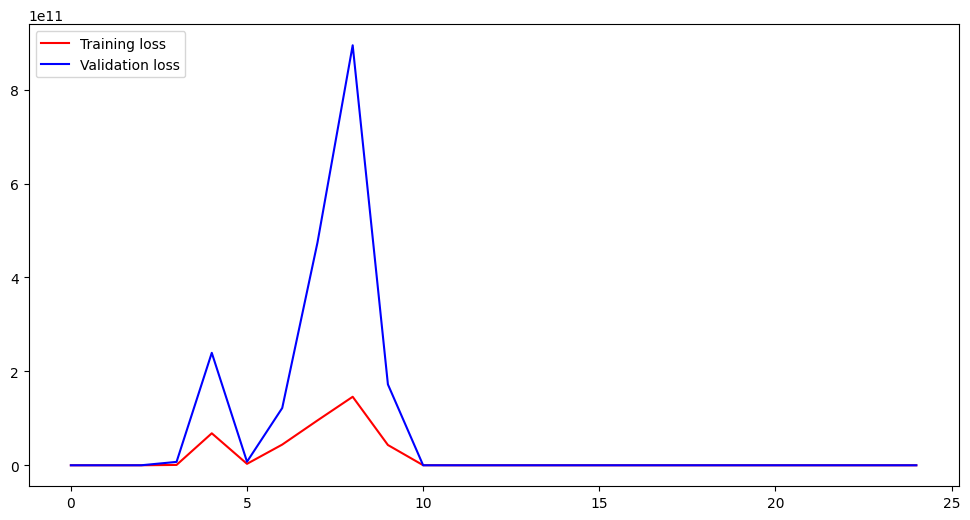

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

fig = plt.figure(figsize = (12,6))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [23]:
image = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-piTr_0007.jpg')
image = cv2.resize(image,(256,256))
image_array = np.array(image)
image_array = image_array.reshape(1,256,256,3)
image_array.shape

(1, 256, 256, 3)

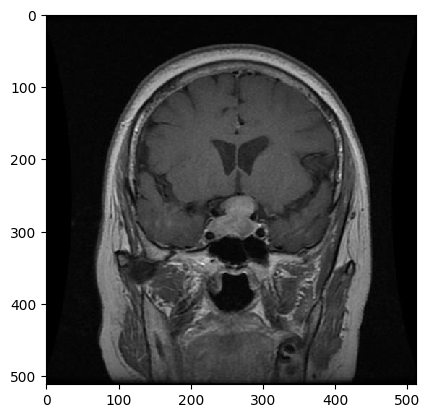

In [24]:
from tensorflow.keras.preprocessing import image
image = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-piTr_0007.jpg')
plt.imshow(image, interpolation='nearest')
plt.show()

In [25]:
a=model.predict(image_array)
indices = a.argmax()
indices

2024-05-25 10:24:52.860115: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387127: 5.77154, expected 5.03187
2024-05-25 10:24:52.860178: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387168: 6.05753, expected 5.31786
2024-05-25 10:24:52.860194: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387274: 5.79451, expected 5.05483
2024-05-25 10:24:52.860210: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387303: 6.3865, expected 5.64683
2024-05-25 10:24:52.860224: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387310: 6.3852, expected 5.64553
2024-05-25 10:24:52.860235: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387370: 6.37416, expected 5.63449
2024-05-25 10:24:52.860246: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387381: 4.72788, expected 3.98821
2024-05-25 10:24:52.86

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2